In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace=True)

In [4]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

In [5]:
df_can.columns=list(map(str,df_can.columns))

In [6]:
df_can.set_index('Country', inplace=True)

In [7]:
df_can['Total']=df_can.sum(axis=1)

In [8]:
years=list(map(str, range(1980, 2014)))

In [10]:
df_can.shape

(195, 38)

In [12]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [14]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
print('version: ', mpl.__version__)

version:  3.1.3


In [54]:
df_continents = df_can.groupby('Continent', axis=0).sum()
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


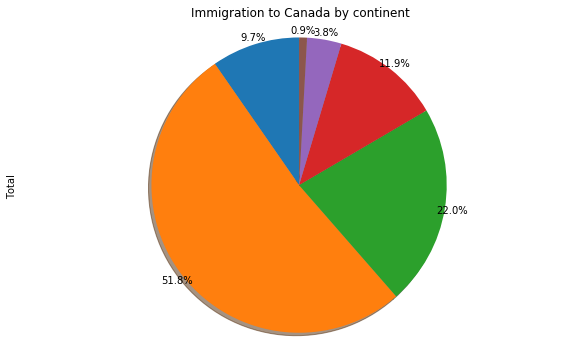

In [30]:
df_continents['Total'].plot(kind='pie',
                            figsize=(10,6),
                            autopct='%1.1f%%',
                            startangle=90,
                            pctdistance=1.0,
                            labels=None,
                            shadow=True,
                           )
plt.title('Immigration to Canada by continent')
plt.axis('Equal')
plt.show()

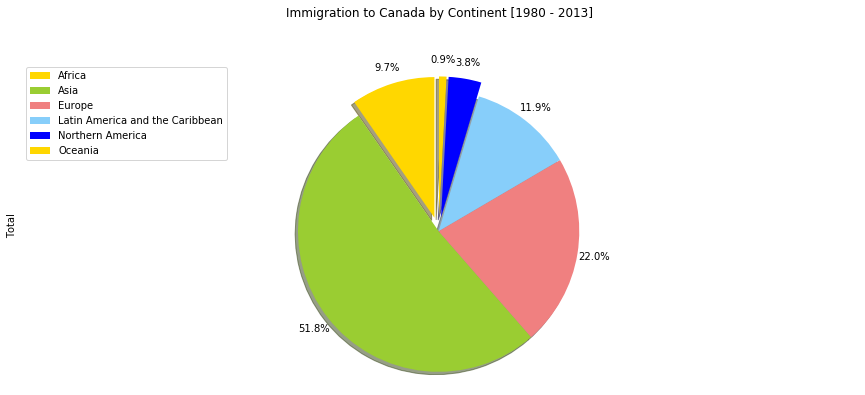

In [34]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'blue']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

In [56]:
df_continents['2013']

Continent
Africa                              38543
Asia                               155075
Europe                              28691
Latin America and the Caribbean     24950
Northern America                     8503
Oceania                              1775
Name: 2013, dtype: int64

(-1.1230629340732377,
 1.310572931944528,
 -1.1024430328216996,
 1.1131729562963064)

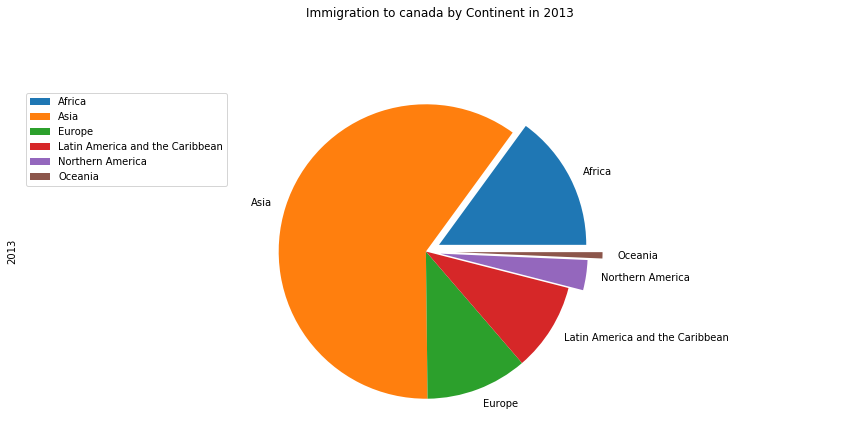

In [67]:
explode_list = [0.1, 0, 0, 0, 0.1, 0.2]
df_continents['2013'].plot(kind='pie',
                          figsize=(15,6),
                          
                          pctdistance=1.12,
                           explode=explode_list
                          )
plt.title('Immigration to canada by Continent in 2013', y=1.2)
plt.legend(labels=df_continents.index,loc='upper left')
plt.axis('equal')

In [68]:
df_japan=df_can.loc['Japan', years].transpose()

In [69]:
df_japan.head()

1980    701
1981    756
1982    598
1983    309
1984    246
Name: Japan, dtype: object

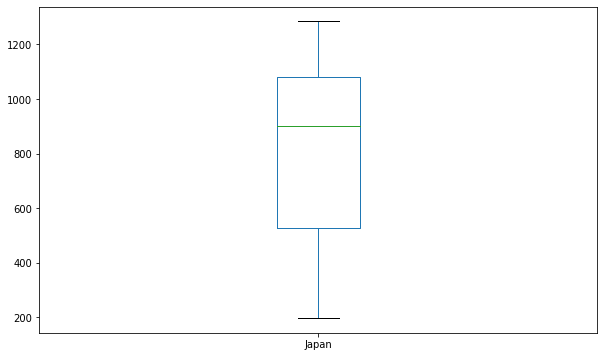

In [70]:
df_japan.plot(kind='box', figsize=(10,6))

In [81]:
df_japan.describe()

count       34
unique      34
top       1214
freq         1
Name: Japan, dtype: int64

In [74]:
df_CI = df_can.loc[['China','India'], years].transpose()

In [76]:
df_CI

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


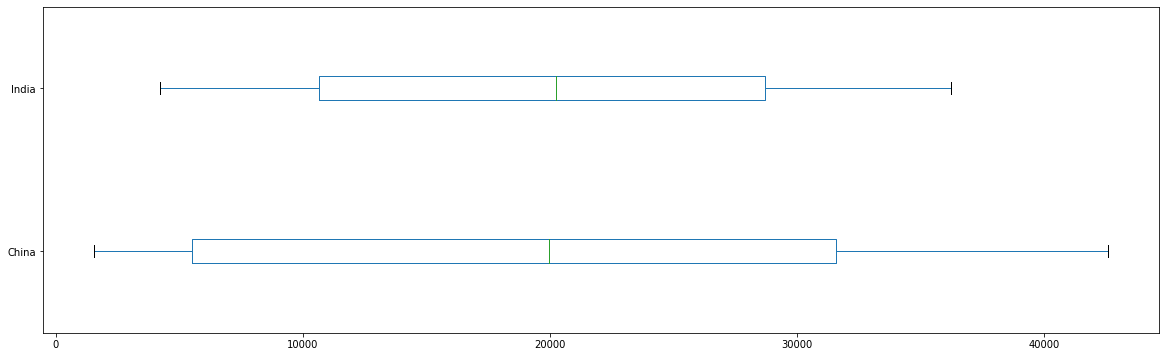

In [85]:
df_CI.plot(kind='box', figsize = (20,6), vert=False)

In [80]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


In [94]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

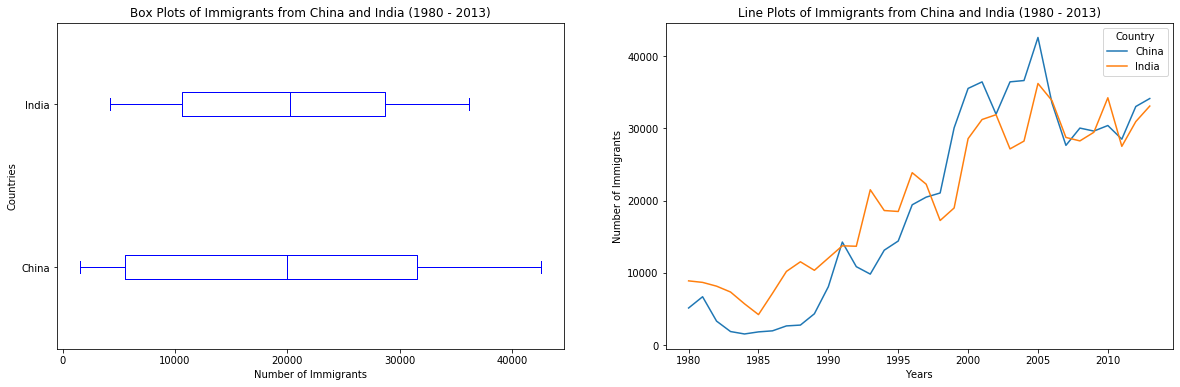

In [100]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

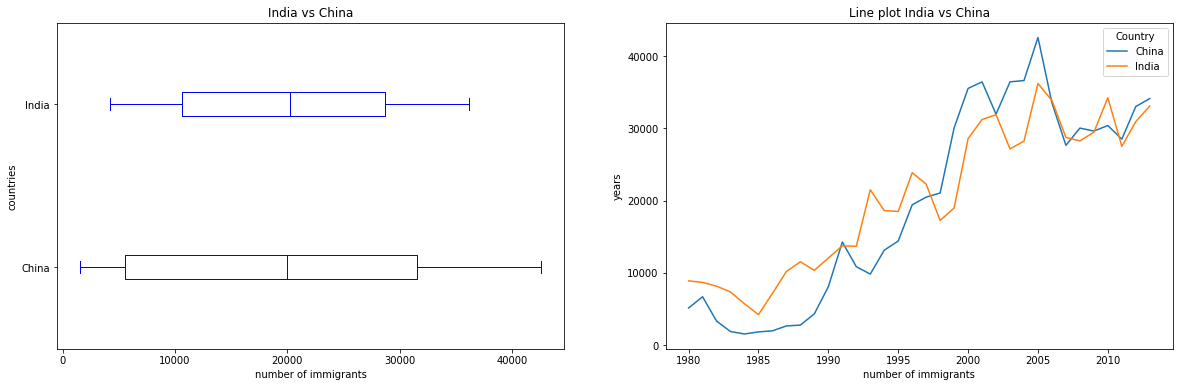

In [102]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_CI.plot(kind='box', color='blue', vert = False, figsize = (20,6), ax = ax0)
ax0.set_title('India vs China')
ax0.set_xlabel('number of immigrants')
ax0.set_ylabel('countries')

df_CI.plot(kind='line', figsize = (20, 6), ax = ax1)
ax1.set_title('Line plot India vs China')
ax1.set_xlabel('number of immigrants')
ax1.set_ylabel('years')

plt.show()


In [104]:
df_can.sort_values('Total', ascending = False, inplace=True)

In [105]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [106]:
df_top15=df_can.head(15)

In [107]:
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [110]:
year80s = list(map(str, range(1980, 1990)))
year90s = list(map(str, range(1990, 2000)))
year00s = list(map(str, range(2000, 2010)))

In [111]:
df_80s = df_top15.loc[:, year80s].sum(axis=1)
df_90s = df_top15.loc[:, year90s].sum(axis=1)
df_00s = df_top15.loc[:, year00s].sum(axis=1)




In [112]:
new_df = pd.DataFrame({'1980s':df_80s, '1990s':df_90s, '2000s':df_00s})
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [113]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


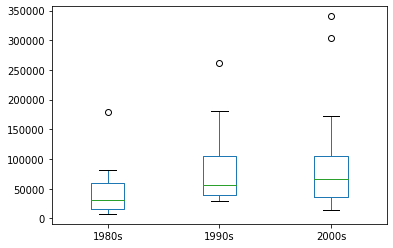

In [114]:
new_df.plot(kind='box')

In [116]:
new_df[new_df['2000s'] > 209611]

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385


# scatter plot

In [128]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

In [129]:
df_tot

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417
1985,69978
1986,86048
1987,134771
1988,139306
1989,164432


In [130]:
df_tot.index = map(int, df_tot.index)

In [131]:
df_tot.reset_index(inplace=True)

In [132]:
df_tot.columns = ['year','total']

In [133]:
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


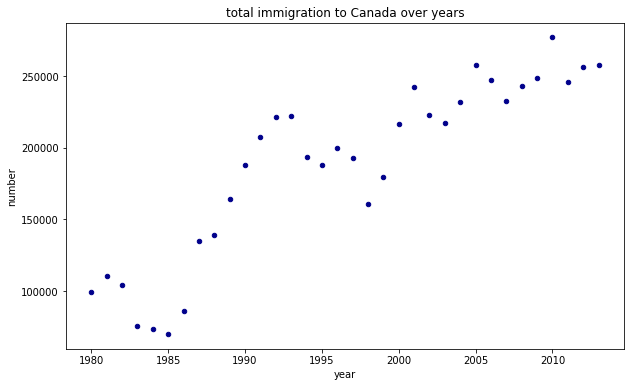

In [134]:
df_tot.plot(kind='scatter', x = 'year', y = 'total', figsize = (10,6), color = 'darkblue')
plt.title('total immigration to Canada over years')
plt.ylabel('number')
plt.xlabel('year')
plt.show()

# Fit a line

In [142]:
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x,y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

# plot the line

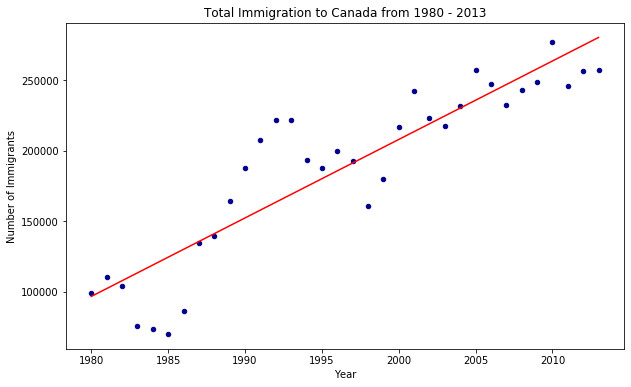

In [143]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
# fit[0] is the slope and fit[1] is the intercept

plt.show()


In [146]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [148]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

In [149]:
df_countries.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [151]:
df_total = pd.DataFrame(df_countries.sum(axis = 1))

In [152]:
df_total.head()

,0
1980,669
1981,678
1982,627
1983,333
1984,252


In [153]:
df_total.reset_index(inplace=True)

In [155]:
df_total.columns = ['year', 'total']

In [156]:
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


In [157]:
df_total['year'] = df_total['year'].astype(int)

In [158]:
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


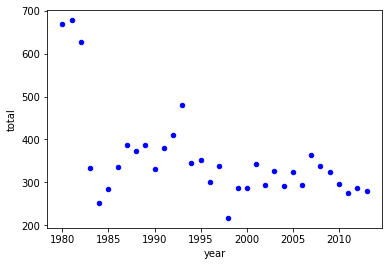

In [160]:
df_total.plot(kind='scatter', x= 'year', y='total', color = 'blue')

In [161]:
x = df_total['year']
y = df_total['total']
fit = np.polyfit(x,y, deg=1)
fit

array([-6.14698243e+00,  1.26281563e+04])

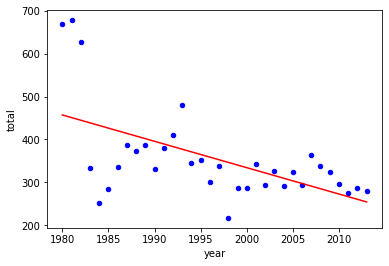

In [163]:
df_total.plot(kind='scatter', x= 'year', y='total', color = 'blue')
plt.plot(x, x*fit[0] + fit[1], color = 'red')
plt.show()

# bubble plot

In [167]:
df_can_t = df_can[years].transpose()

In [168]:
df_can_t.index = map(int, df_can_t.index)

In [169]:
df_can_t.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,8880,5123,22045,6051,978,9378,1172,185,1011,863,...,0,0,0,0,0,1,0,0,0,0
1981,8670,6682,24796,5921,972,10030,1429,371,1456,2930,...,0,0,0,1,1,0,0,0,0,0
1982,8147,3308,20620,5249,1201,9074,1822,290,1572,5881,...,0,0,0,0,0,0,0,0,0,0
1983,7338,1863,10015,4562,900,7100,1592,197,1081,4546,...,1,0,0,0,0,0,0,0,0,0
1984,5704,1527,10170,3801,668,6661,1977,1086,847,3588,...,0,0,0,1,0,0,0,0,0,0


In [170]:
df_can_t.index.name = 'Year'

In [172]:
df_can_t.reset_index(inplace=True)

In [173]:
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


In [174]:
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

In [176]:
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min())/ (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

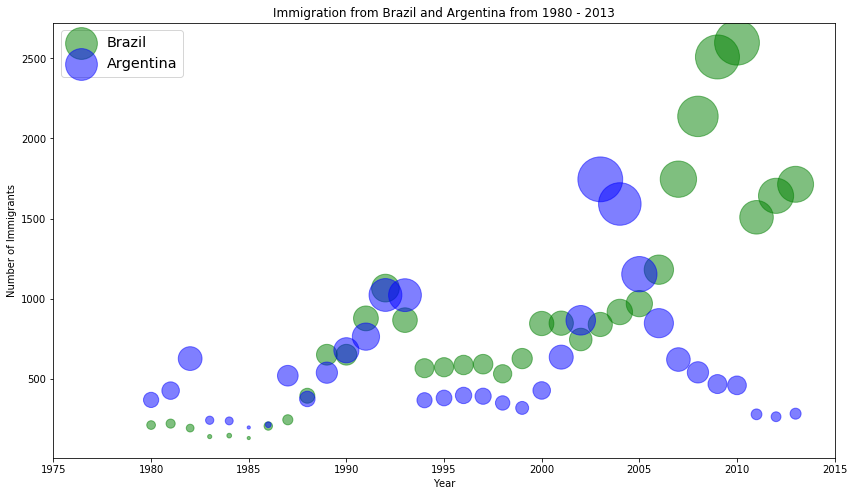

In [177]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')